In [82]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
#load AmBe data
filename='/depot/darkmatter/data/xenonnt/AmBe/_ambe_bottom_cw11d2m-yqoqgyttzr.npy'
df=pd.DataFrame(np.load(filename))

In [84]:
#load Rn data
filename2='/depot/darkmatter/data/xenonnt/rn220/nt_sr0_rn220_runs_cmtv7_tag20220305.hdf'
df1=pd.read_hdf(filename2, "table")

In [98]:
for key in df1:
    print(key)

run_id
time
endtime
cut_cs2_area_fraction_top
cut_daq_veto
cut_fiducial_volume
cut_interaction_exists
cut_main_is_valid_triggering_peak
cut_pres2_junk
cut_rn220_s2_area
cut_run_boundaries
cut_s1_area_fraction_top
cut_s1_max_pmt
cut_s1_pattern_bottom
cut_s1_pattern_top
cut_s1_single_scatter
cut_s1_tightcoin_3fold
cut_s1_width
cut_s2_pattern
cut_s2_recon_pos_diff
cut_s2_single_scatter
cut_s2_width
cuts_rn220
cs1
cs1_wo_timecorr
cs2_wo_elifecorr
cs2_wo_timecorr
cs2_area_fraction_top
cs2_bottom
cs2
alt_cs1
alt_cs1_wo_timecorr
alt_cs2_wo_elifecorr
alt_cs2_wo_timecorr
alt_cs2_area_fraction_top
alt_cs2_bottom
alt_cs2
e_light
e_charge
e_ces
n_peaks
drift_time
event_number
s1_index
alt_s1_index
s1_time
alt_s1_time
s1_center_time
alt_s1_center_time
s1_endtime
alt_s1_endtime
s1_area
alt_s1_area
s1_n_channels
alt_s1_n_channels
s1_n_hits
alt_s1_n_hits
s1_n_competing
alt_s1_n_competing
s1_max_pmt
alt_s1_max_pmt
s1_max_pmt_area
alt_s1_max_pmt_area
s1_range_50p_area
alt_s1_range_50p_area
s1_range_90p_

In [95]:
df['log_cs2_bottom']=np.log10(df.cs2_bottom)
df1['log_cs2_bottom']=np.log10(df1.cs2_bottom)

/depot/darkmatter/etc/conda/env/anacondark/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/depot/darkmatter/etc/conda/env/anacondark/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [113]:
bad=df1[(df1['cut_cs2_area_fraction_top'])
                &(df1['cut_daq_veto'])
                &(df1['cut_main_is_valid_triggering_peak'])
                &(df1['cut_interaction_exists'])
                &(df1['cut_run_boundaries'])
                &(df1['cut_s1_area_fraction_top'])
                &(df1['cut_s1_max_pmt'])
                &(df1['cut_s1_pattern_bottom'])
                &(df1['cut_s1_pattern_top'])
                &(df1['cut_s1_single_scatter'])
                &(df1['cut_s1_width'])
                &(df1['cut_s2_pattern'])
                &(df1['cut_s2_recon_pos_diff'])
                &(df1['cut_s2_single_scatter'])
                &(df1['cut_s1_tightcoin_3fold'])
                &(df1['cut_pres2_junk'])
                &(df1['cuts_rn220'])
       &(df1['cs1']< 100)&(df1['cs2']<5e3)]

In [102]:
# print(len(bad))
# bad=bad.dropna()
# print(len(bad))

In [13]:
# for i in df.keys():
#     print(i)

In [126]:
mask=((df['cut_cs2_area_fraction_top'])
                &(df['cut_daq_veto'])
                &(df['cut_main_is_valid_triggering_peak'])
                &(df['cut_interaction_exists'])
                &(df['cut_run_boundaries'])
                &(df['cut_s1_area_fraction_top'])
                &(df['cut_s1_max_pmt'])
                &(df['cut_s1_pattern_bottom'])
                &(df['cut_s1_pattern_top'])
                &(df['cut_s1_single_scatter'])
                &(df['cut_s1_width'])
                &(df['cut_s2_pattern'])
                &(df['cut_s2_recon_pos_diff'])
                &(df['cut_s2_single_scatter'])
              # &(df['cut_s2_width_wire_modeled_wimps'])
                &(df['cut_nv_tpc_coincidence_ambe'])
                &(df['cut_s1_tightcoin_3fold'])
               #&(df['cut_fiducial_volume'])
               #&(df['cut_s2_naive_bayes'])
              # &(df['cut_s1_naive_bayes'])
     )
good=df.loc[(df['cs1']< 100)&(df['cs2']<5e3)& mask]
#bad=df.loc[(df['e_ces']< 100)&(df['e_ces']>0)& (not mask.all())]
good.loc[:,'good']=np.ones(len(good),dtype=bool)
bad.loc[:,'good']=np.zeros(len(bad),dtype=bool)

/depot/darkmatter/etc/conda/env/anacondark/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/depot/darkmatter/etc/conda/env/anacondark/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [127]:
good=good.dropna(subset=['cs1', 'cs2'])
bad=bad.dropna(subset=['cs1', 'cs2'])

In [128]:
training=good[:len(good)//2].append(bad[:len(good)//2], ignore_index=True)
testing=good[len(good)//2 : ].append(bad[len(good)//2:len(good)], ignore_index=True)

In [129]:
len(training)

356

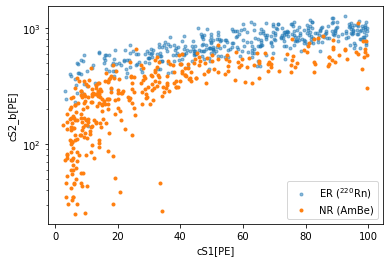

In [130]:
plt.scatter(bad.cs1,bad.cs2_bottom,marker='.',label='ER ($^{220}$Rn)',alpha=0.5)
plt.scatter(good.cs1,good.cs2_bottom,marker='.',label='NR (AmBe)',alpha=1)
plt.yscale('log')
plt.xlabel('cS1[PE]')
plt.ylabel('cS2_b[PE]')
plt.legend()

In [131]:
features=['cs1','log_cs2_bottom']#,'s1_max_pmt','s1_area_fraction_top','s2_range_50p_area','s1_range_50p_area']
X=training[features]
y=training['good']

X_t=testing[features]
y_t=testing['good']

# GridSVC

In [ ]:
# est = ms.GridSearchCV(
#     svm.SVC(), {'C': np.logspace(-3., 3., 50),
#                 'gamma': np.logspace(-3., 3., 50)})
# est.fit(X, y)
# print("Training Score: {0:.3f}".format(
#       ms.cross_val_score(est, X, y).mean()))

In [ ]:

# xx, yy = np.meshgrid(np.linspace(0,300,50),
#                      np.linspace(1,5,50))

# Z = est.decision_function(np.c_[xx.ravel(),
#                                     yy.ravel()])
# Z = Z.reshape(xx.shape)
# cmap = plt.cm.binary
# fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# pos=ax.imshow(Z,
#               extent=(xx.min(), xx.max(),
#                       yy.min(), yy.max()),
#               aspect='auto',
#               origin='lower',
#               cmap=cmap)
# fig.colorbar(pos, ax=ax)

# ax.contour(xx, yy, Z, levels=[0],
#                linewidths=2,
#                colors='k')

# plt.scatter(bad.cs1[:len(good)*10],bad.log_cs2[:len(good)*10],marker='.',label='bad',alpha=0.5,color='r')
# plt.scatter(good.cs1,good.log_cs2,marker='.',label='good',alpha=0.5,color='orange')

# plt.xlabel('cS1[PE]')
# plt.ylabel('log cS2_b[PE]')
# plt.legend()

In [ ]:
# print("Test Score: {0:.3f}".format(
#       ms.cross_val_score(est, X_t[:1000], y_t[:1000]).mean()))

# NuSVC

In [142]:
# fit the model
clf = svm.NuSVC(gamma="auto",nu=0.5)
est1=clf.fit(X, y)

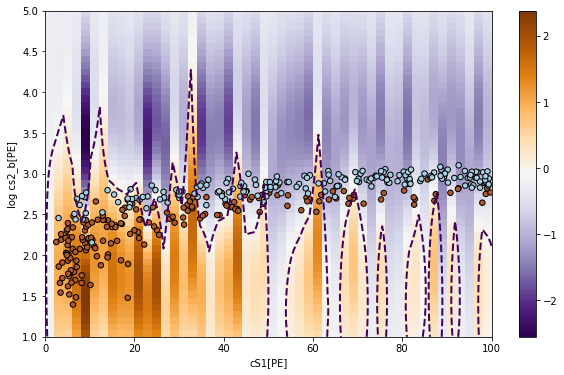

In [144]:

xx, yy = np.meshgrid(np.linspace(0,100,50),
                     np.linspace(1,5,50))



# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
pos=ax.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
fig.colorbar(pos,ax=ax)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X.cs1, X.log_cs2_bottom, s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")

# plt.xticks(())
# plt.yticks(())
plt.xlabel('cS1[PE]')
plt.ylabel('log cs2_b[PE]')
#plt.axis([-3, 3, -3, 3])
plt.show()


# Adaboost

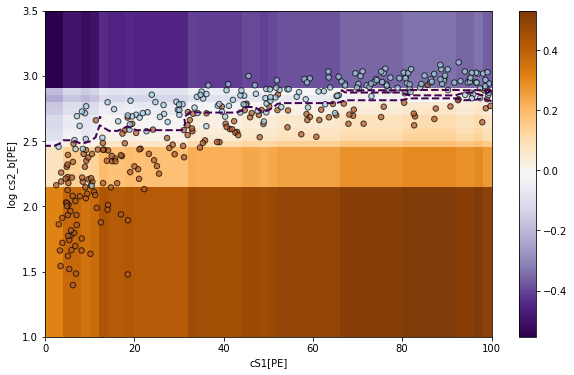

In [168]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


xx, yy = np.meshgrid(np.linspace(0,100,50),
                     np.linspace(1,3.5,50))

# Create and fit an AdaBoosted decision tree
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME.R", n_estimators=80
)

ada.fit(X, y)

Z = ada.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
pos=ax.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
fig.colorbar(pos,ax=ax)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X.cs1, X.log_cs2_bottom, s=30, c=y, cmap=plt.cm.Paired, edgecolors="k",alpha=0.7)
# plt.xticks(())
# plt.yticks(())
plt.xlabel('cS1[PE]')
plt.ylabel('log cs2_b[PE]')
plt.show()


In [169]:
y_pred = ada.predict(X_t)

In [170]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_t, y_pred))

Accuracy: 0.8770949720670391


In [171]:
def compute_roc(y_true, y_pred, plot=False):
    """
    TODO
    :param y_true: ground truth
    :param y_pred: predictions
    :param plot:
    :return:
    """
    fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
    auc_score = metrics.auc(fpr, tpr)
    if plot:
        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, color='blue',
                 label='ROC (AUC = %0.4f)' % auc_score)
        plt.legend(loc='lower right')
        plt.title("ROC Curve")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.show()

    return fpr, tpr,

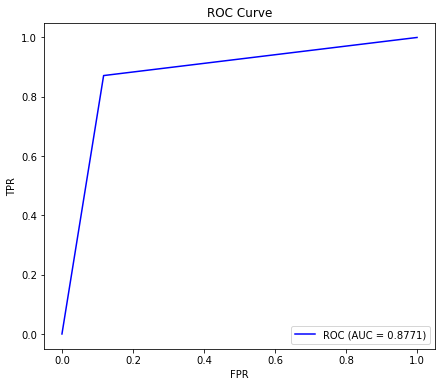

(array([0.        , 0.11731844, 1.        ]),
 array([0.        , 0.87150838, 1.        ]))

In [172]:
compute_roc(y_t, y_pred, plot=True)